<br> <br> <br>
Molly McKnight <br>
GEOG 5314 <br>
4/5/2019

<h3><center>Assignment #3 - Democrat Counties Live Longer, Fitter, and Thinner Lives</center></h3>

#### I. Analysis Summary

Dr. Richard Middleton, a senior scientist and manager in the Computational Earth Science group at [Los Alamos National Laboratory](https://www.lanl.gov/), explores societal issues using data-driven analytics and visualizations on his blog [Charted Territory](https://chartedterritory.us/).

In his blog post "[Illuminating America: Democrat Counties Live Longer, Fitter, and Thinner Lives… But Health Doesn’t Predict 2016 Election](https://chartedterritory.us/2018/11/15/illuminating-america-democrat-counties-live-longer-fitter-and-thinner-lives-but-health-doesnt-predict-2016-election/)," Dr. Middleton examined whether life expectancy and obesity rates were metrics for predicting the 2016 presidential election.

His article had two takeaways. First, blue counties tend to have longer life expectancies and lower obesity rates than red counties. (Blue counties live 1.4 years longer and are 10 percent less obese than red counties.) Second, these health metrics were a poor predictor for the 2016 presidential election and could only predict between 5.2 and 7.9 percent of the election results. 

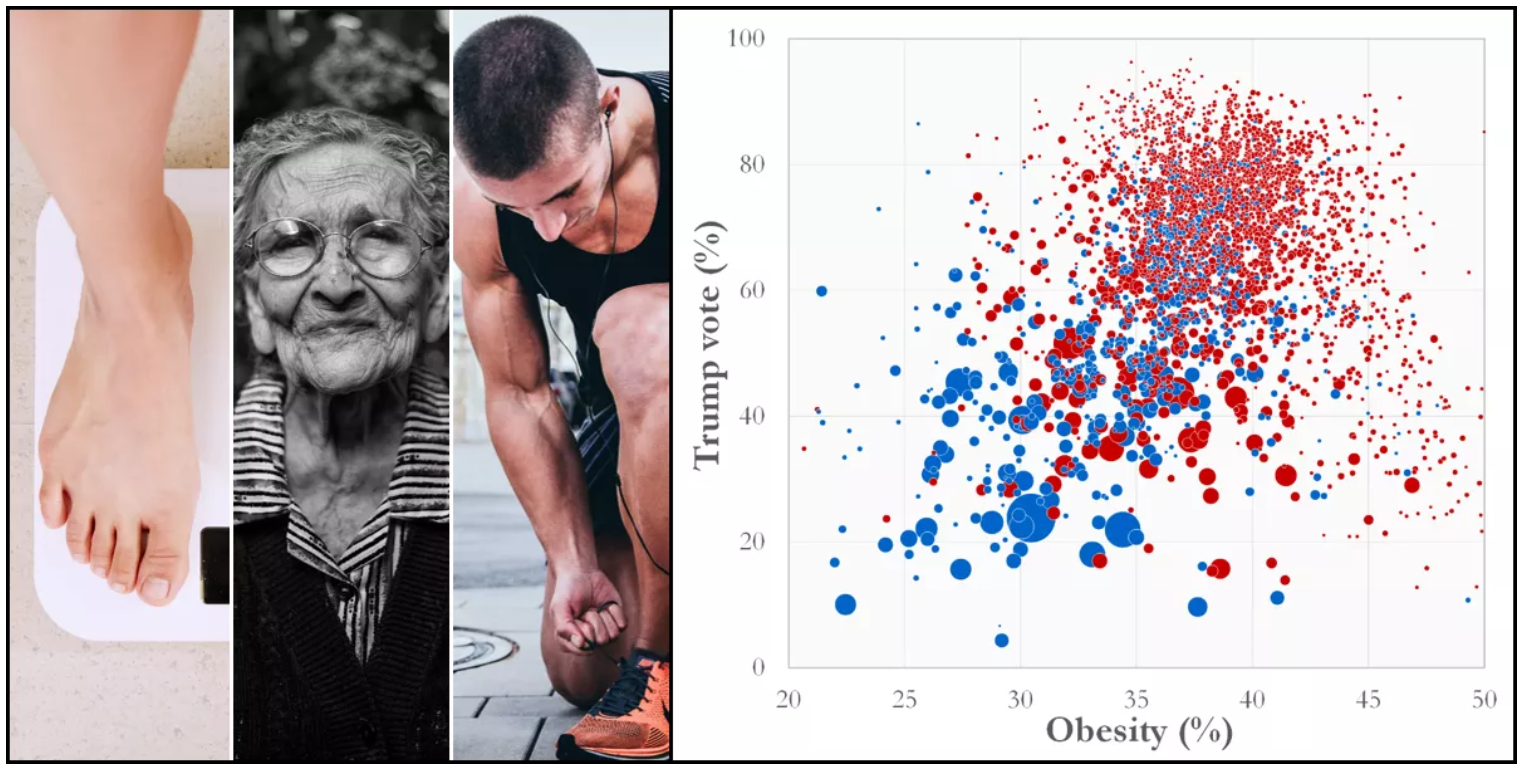

<center>Figure I. Trump Vote by County (Percent) vs. County Population with Obesity (Percent)</center>

In Figure I, Dr. Middleton plotted the percentage of people who voted for Trump in each county (y-axis) by the percentage of county population with obesity in each county (x-axis). Each bubble represents an individual county, and the area of each bubble is proportional to that county's population size. The color of each bubble indicates whether the county was in a red or blue state. Counties above 50% on the x-axis voted for Trump, and counties below 50% on the x-axis voted for Clinton.

I thought it was interesting that Dr. Middleton wanted to examine whether the health metrics of life expectancy and obesity rates were a predictor for the 2016 presidential election. Health and access to healthcare are usually hot-button issues, but it appears that these county health metrics cannot predict how people vote. It is possible that people prioritize voting along party lines instead of voting to support legislation that could potentially give them access to improved health outcomes. 

#### I. Data Cleaning

To recreate Figure I, I cleaned various datasets using these steps -
1. Import County Level Presidential Election Results file, 2016 County Health Rankings file, and 2016 ACS County Total Population file
2. Set the indexes of the three files from Step 1 using the five-digit GEOID number
3. Create data frame of relevant fields
4. Export the data frame to an Excel file (for use in ArcGIS Pro)

In [22]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Read in the County Level Presidential Election Results file
df_county_results = pd.read_excel(r'C:\Users\mxmmc\Desktop\presidential_election_results.xlsx', dtype = {'geoid':np.str})

# Use 'geoid' as the unique identifier
df_county_results = df_county_results.set_index('geoid')

In [3]:
# Read in 2016 County Health Rankings file
df_chr_2016 = pd.read_excel(r'C:\Users\mxmmc\Desktop\CHR_2016.xlsx', dtype = {'FIPS':np.str})

# Use 'FIPS' as the unique identifier
df_chr_2016 = df_chr_2016.set_index('FIPS')

In [4]:
# Read in the 2016 ACS County Total Population file
df_total_pop_2016 = pd.read_excel(r'C:\Users\mxmmc\Desktop\total_population_2016.xlsx', dtype = {'geoid':np.str})

# Use 'geoid' as the unique identifier
df_total_pop_2016 = df_total_pop_2016.set_index('geoid')

In [5]:
# Prepare a data frame with fields needed for analysis 
df = pd.DataFrame()
df['obesity_pct_2016'] = df_chr_2016['Adult obesity - % Obese - 2016']
df['trump_pct_2016'] = (df_county_results['gop_2016'] / df_county_results['total_2016']) * 100
df['total_pop'] = df_total_pop_2016['total_population']
df['bubble_size'] = ((df_total_pop_2016['total_population'] - df_total_pop_2016['total_population'].min()) / \
                    (df_total_pop_2016['total_population'].max() - df_total_pop_2016['total_population'].min())) * 100
df['bubble_color'] = df_chr_2016['State'].replace('Alabama', 'red').replace('Alaska', 'red').replace('Arizona', 'red'). \
                     replace('Arkansas', 'red').replace('California', 'blue').replace('Colorado', 'blue'). \
                     replace('Connecticut', 'blue').replace('Delaware', 'blue').replace('District of Columbia', 'blue'). \
                     replace('Florida', 'red').replace('Georgia', 'red').replace('Hawaii', 'blue'). \
                     replace('Idaho', 'red').replace('Illinois', 'blue').replace('Indiana', 'red').replace('Iowa', 'red'). \
                     replace('Kansas', 'red').replace('Kentucky', 'red').replace('Louisiana', 'red'). \
                     replace('Maine', 'blue').replace('Maryland', 'blue').replace('Massachusetts', 'blue'). \
                     replace('Michigan', 'red').replace('Minnesota', 'blue').replace('Mississippi', 'red'). \
                     replace('Missouri', 'red').replace('Montana', 'red').replace('Nebraska', 'red'). \
                     replace('Nevada', 'blue').replace('New Hampshire', 'blue').replace('New Jersey', 'blue'). \
                     replace('New Mexico', 'blue').replace('New York', 'blue').replace('North Carolina', 'red'). \
                     replace('North Dakota', 'red').replace('Ohio', 'red').replace('Oklahoma', 'red'). \
                     replace('Oregon', 'blue').replace('Pennsylvania', 'red').replace('Rhode Island', 'blue'). \
                     replace('South Carolina', 'red').replace('South Dakota', 'red').replace('Tennessee', 'red'). \
                     replace('Texas', 'red').replace('Utah', 'red').replace('Vermont', 'blue'). \
                     replace('Virginia', 'blue').replace('Washington', 'blue').replace('West Virginia', 'red'). \
                     replace('Wisconsin', 'red').replace('Wyoming', 'red')

# View data frame
df.head()

,obesity_pct_2016,trump_pct_2016,total_pop,bubble_size,bubble_color
FIPS,,,,,
01001,30.9,73.435789,55049.0,0.546610,red
01003,26.7,77.351472,199510.0,1.983021,red
01005,40.8,52.271415,26614.0,0.263874,red
01007,40.1,76.966164,22572.0,0.223683,red
01009,32.4,89.851875,57704.0,0.573009,red


In [6]:
# Save data frame in the XLSX format
df.to_excel(r'C:\Users\mxmmc\Desktop\results_2016.xlsx')

In [7]:
# Create data frame of counties in blue states
df_blue_counties = pd.DataFrame()
df_blue_counties = df.loc[df['bubble_color'] == 'blue']

In [8]:
# Create data frame of counties in red states
df_red_counties = pd.DataFrame()
df_red_counties = df.loc[df['bubble_color'] == 'red']

#### II. Data Visualizations

I created three graphs that displayed Trump Vote by County (Percent) vs. County Population with Obesity (Percent). Figure II depicts only counties in blue states, and Figure III depicts only counties in red states. Figure IV is the closest I was able to get to recreating Dr. Middleton's graph, and it displays the counties in both red and blue states.

Text(0, 0.5, 'Trump Vote by County (Percent)')

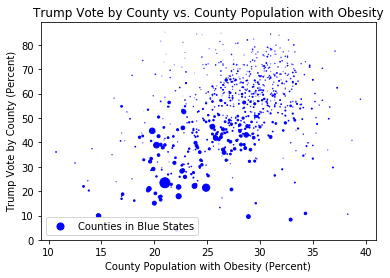

In [9]:
# Create scatter plot of counties in blue states
blue_plt = df_blue_counties.plot.scatter(x = 'obesity_pct_2016', 
                                         y = 'trump_pct_2016',
                                         s = df_blue_counties['bubble_size'],
                                         label = 'Counties in Blue States',
                                         c = 'blue')

# Set title, x-axis, and y-axis labels
blue_plt.set_title("Trump Vote by County vs. County Population with Obesity")
blue_plt.set_xlabel("County Population with Obesity (Percent)")
blue_plt.set_ylabel("Trump Vote by County (Percent)")

<center>Figure II. Trump Vote by Counties in Blue States (Percent) vs. County Population with Obesity (Percent)</center><br>

Text(0, 0.5, 'Trump Vote by County (Percent)')

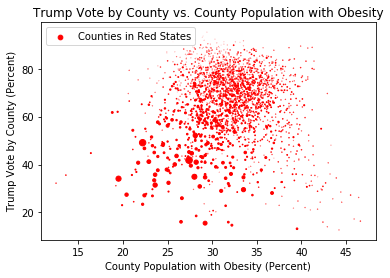

In [10]:
# Create scatter plot of counties in red states
red_plt = df_red_counties.plot.scatter(x = 'obesity_pct_2016', 
                                       y = 'trump_pct_2016',
                                       s = df_red_counties['bubble_size'],
                                       c = 'red',
                                       label = 'Counties in Red States')

# Set title, x-axis, and y-axis labels
red_plt.set_title("Trump Vote by County vs. County Population with Obesity")
red_plt.set_xlabel("County Population with Obesity (Percent)")
red_plt.set_ylabel("Trump Vote by County (Percent)")

<center>Figure III. Trump Vote by Counties in Red States (Percent) vs. County Population with Obesity (Percent)</center><br>

In [11]:
# Replace 'red' and 'blue' in the bubble_color column with 0 and 1 respectively 
df['bubble_color'] = df['bubble_color'].replace('red', 0).replace('blue', 1)
df.head()

,obesity_pct_2016,trump_pct_2016,total_pop,bubble_size,bubble_color
FIPS,,,,,
01001,30.9,73.435789,55049.0,0.546610,0.0
01003,26.7,77.351472,199510.0,1.983021,0.0
01005,40.8,52.271415,26614.0,0.263874,0.0
01007,40.1,76.966164,22572.0,0.223683,0.0
01009,32.4,89.851875,57704.0,0.573009,0.0


Text(0, 0.5, 'Trump Vote by County (Percent)')

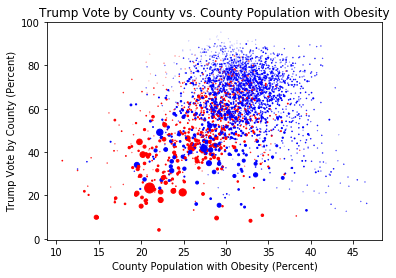

In [12]:
# Create scatter plot of counties in blue and red states
combined_plt = plt.scatter(x = df['obesity_pct_2016'],
                           y = df['trump_pct_2016'],
                           s = df['bubble_size'], 
                           c = df['bubble_color'],
                           cmap = 'bwr')
""
# Set title, x-axis, and y-axis labels
plt.title("Trump Vote by County vs. County Population with Obesity")
plt.xlabel("County Population with Obesity (Percent)")
plt.ylabel("Trump Vote by County (Percent)")

<center>Figure IV. Trump Vote by Counties (Percent) vs. County Population with Obesity (Percent)</center>

#### III. Regression Analysis

I completed the regression analysis for the scatter plot that included counties in both red and blue states using StatsModels and Seaborn. First, I created a table that summarizes the regression analysis (Figure V), and then I visualized the line of best fit within a scatter plot (Figure VI).

After completing the analysis, I noticed that my r-squared value was 0.075 whereas Dr. Middleton's r-squared value was 0.003. This difference can be attributed to Dr. Middleton using 2011-2012 obesity rate data and my use of 2016 obesity rate data. However, both coefficients of determination are extremely small, meaning that Dr. Middleton's conclusion of obesity being a poor election predictor is also a viable conclusion for the data I used.

In [37]:
# Create summary table of regression results using the power model
df_summary = pd.DataFrame()
df_summary['x'] = df['obesity_pct_2016'].values
df_summary['y'] = df['trump_pct_2016'].values
df_summary = df_summary.sort_values(by='x')
results = smf.ols(formula = 'np.log(y) ~ np.log(x)', data = df_summary).fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           7.42e-55
Time:                        15:59:42   Log-Likelihood:                -696.93
No. Observations:                3112   AIC:                             1398.
Df Residuals:                    3110   BIC:                             1410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2113      0.120     18.490      0.0

<center>Figure V. OLS Regression Summary Analysis - Trump Vote by Counties in Blue States (Percent) vs. County Population with Obesity (Percent)</center><br>

Text(0, 0.5, 'Trump Vote by County (Percent)')

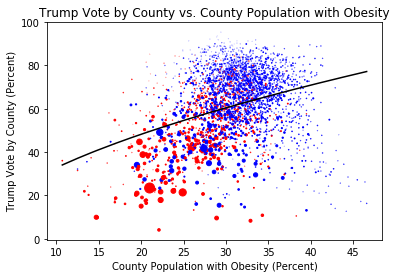

In [38]:
# Generate the line of best fit for the combined_plt (see above)
regression_plt = plt.scatter(x = df['obesity_pct_2016'],
                             y = df['trump_pct_2016'],
                             s = df['bubble_size'], 
                             c = df['bubble_color'],
                             cmap = 'bwr')

# Create a fit_y based on the model
fit_y = np.e**results.params[0] * (df_summary['x'] ** results.params[1])
plt.plot(df_summary['x'], 
         fit_y, 
         color = 'black')

# Set title, x-axis, and y-axis labels
plt.title("Trump Vote by County vs. County Population with Obesity")
plt.xlabel("County Population with Obesity (Percent)")
plt.ylabel("Trump Vote by County (Percent)")

<center>Figure VI. Regresssion Analysis - Trump Vote by Counties in Blue States (Percent) vs. County Population with Obesity (Percent)</center>

#### IV. Residual Analysis

I completed the residual analysis portion of this assignment in ArcGIS Pro using these steps -
1. Use Excel to Table (Conversion Tools) to import the 'results_2016.xlsx' into ArcGIS Pro
2. Use Add Join (Data Management Tools) to join the table to a shapefile of US counties
3. Use Copy Features (Data Management Tools) to export the joined table and shapefile to a new feature class
4. Use Ordinary Least Squares (OLS) (Spatial Statistics Tools) to create a map of the standard deviation of the residuals, and select 'trump_pct' as the Dependent Variable parameter and 'obesity_pct' as the Explanatory Variable parameter 

The residuals represent how far away true observations are from the line of best fit (Figure VI). Therefore, Figure VII highlights the unusualness of a county's value. It is important to note that the map displays standard deviations and not raw values of how far away true observations are from the line of best fit. The map's legend indicates that the closer to dark-red a county is, the farther below it is from the line of best fit (or expected value). The closer to dark-blue a county is, the farther above it is from the line of best fit (or expected value). Counties that are pale-yellow are closest to the line of best fit. 

The regression analysis indicated that obesity is a poor election predictor, and this conclusion is supported by the residual analysis map. The majority of the counties in the map below are either red or blue, which indicates that many counties stray from the line of best fit.

Theoretically, if obesity were a good election predictor, then many of the counties would not stray from the line of best fit. The coefficient of determination value would also be closer to one. A hypothetical map representing this scenario would have more pale-yellow counties than red or blue counties.

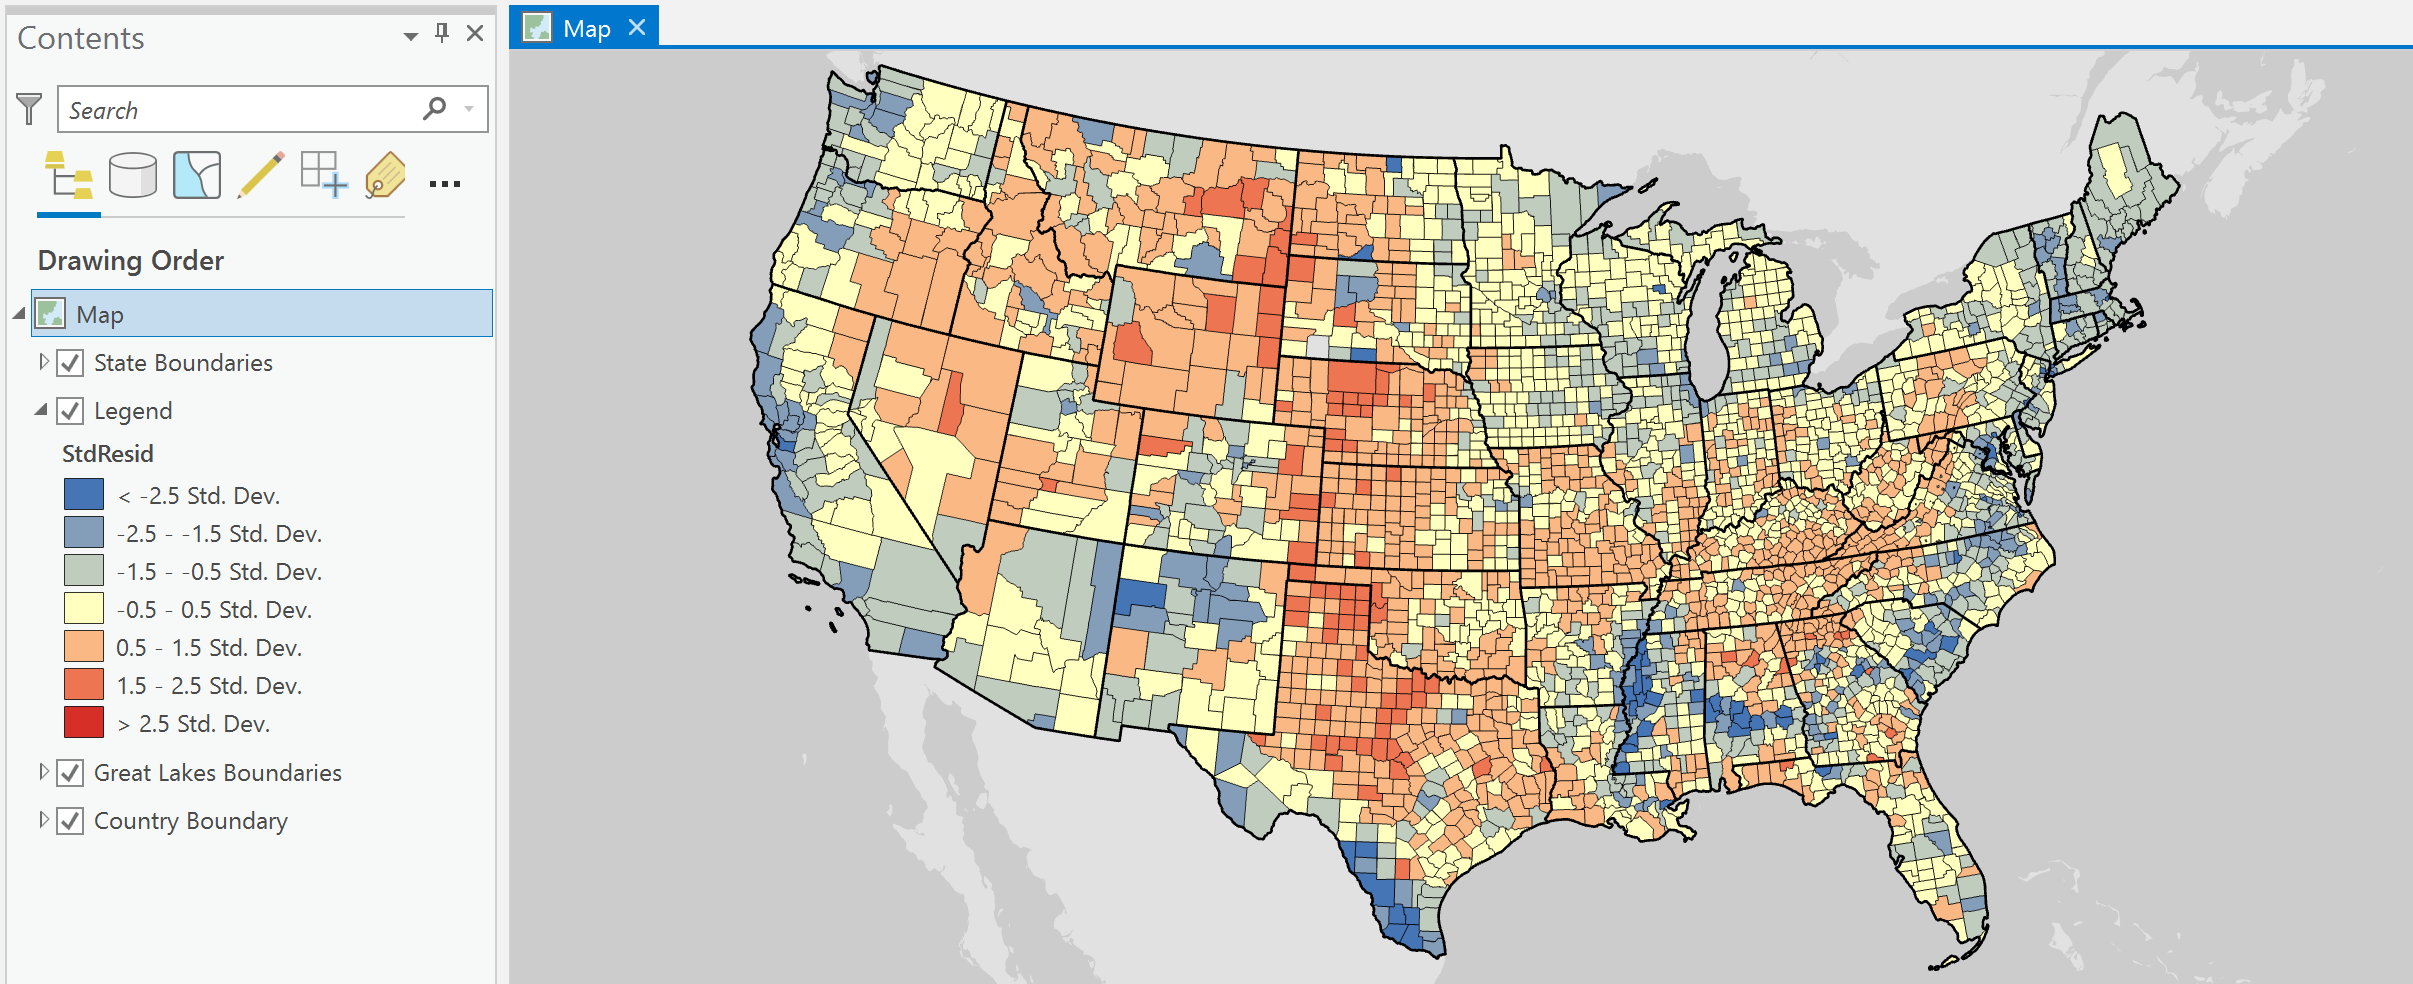

<center>Figure VII. Residual Analysis Map - Trump Vote by Counties in Blue States (Percent) vs. County Population with Obesity (Percent)</center>

#### V. Four-Year Trend Analysis

I completed the four-year trend analysis portion of this assignment in ArcGIS Pro using these steps -
1. Read in the 2012 County Health Rankings file
2. Calculate the difference between 2012 and 2016 percentage values for County Population with Obesity and Trump Vote by Counties in Blue States
3. Export the data frame to an Excel file (for use in ArcGIS Pro)
4. Use Excel to Table (Conversion Tools) to import the 'results_2012&2016.xlsx' into ArcGIS Pro
5. Use Add Join (Data Management Tools) to join the table to a shapefile of US counties
6. Use Copy Features (Data Management Tools) to export the joined table and shapefile to a new feature class
7. Use Ordinary Least Squares (OLS) (Spatial Statistics Tools) to create a map of the standard deviation of the residuals, and select 'trump_pct_diff' as the Dependent Variable parameter and 'obesity_pct_diff' as the Explanatory Variable parameter 

The residuals in Figure VIII represent how far away true observations are from the line of best fit. Figure VII highlights the unusualness in the change of a county's value between 2012 and 2016. For example, most of the counties in Utah and the southeast corner of Idaho experienced a highly unusual, positive change from the line of best fit between 2012 and 2016. Like Figure VII, Figure VIII displays standard deviations and not raw values of how far away true observations are from the line of best fit.

In [ ]:
# Read in 2012 County Health Rankings file
df_chr_2012 = pd.read_excel(r'C:\Users\mxmmc\Desktop\CHR_2012.xlsx', dtype = {'FIPS':np.str})

# Use 'FIPS' as the unique identifier
df_chr_2012 = df_chr_2012.set_index('FIPS')

In [ ]:
# Add 'obesity_pct_2012' to the data frame
df['obesity_pct_diff'] = df['obesity_pct_2016'] - df_chr_2012['Adult obesity - % Obese - 2012']
df['trump_pct_diff'] = df['trump_pct_2016'] - ((df_county_results['gop_2012'] / df_county_results['total_2012']) * 100)
df.head()

In [ ]:
# Save data frame in the XLSX format
df.to_excel(r'C:\Users\mxmmc\Desktop\results_differences.xlsx')

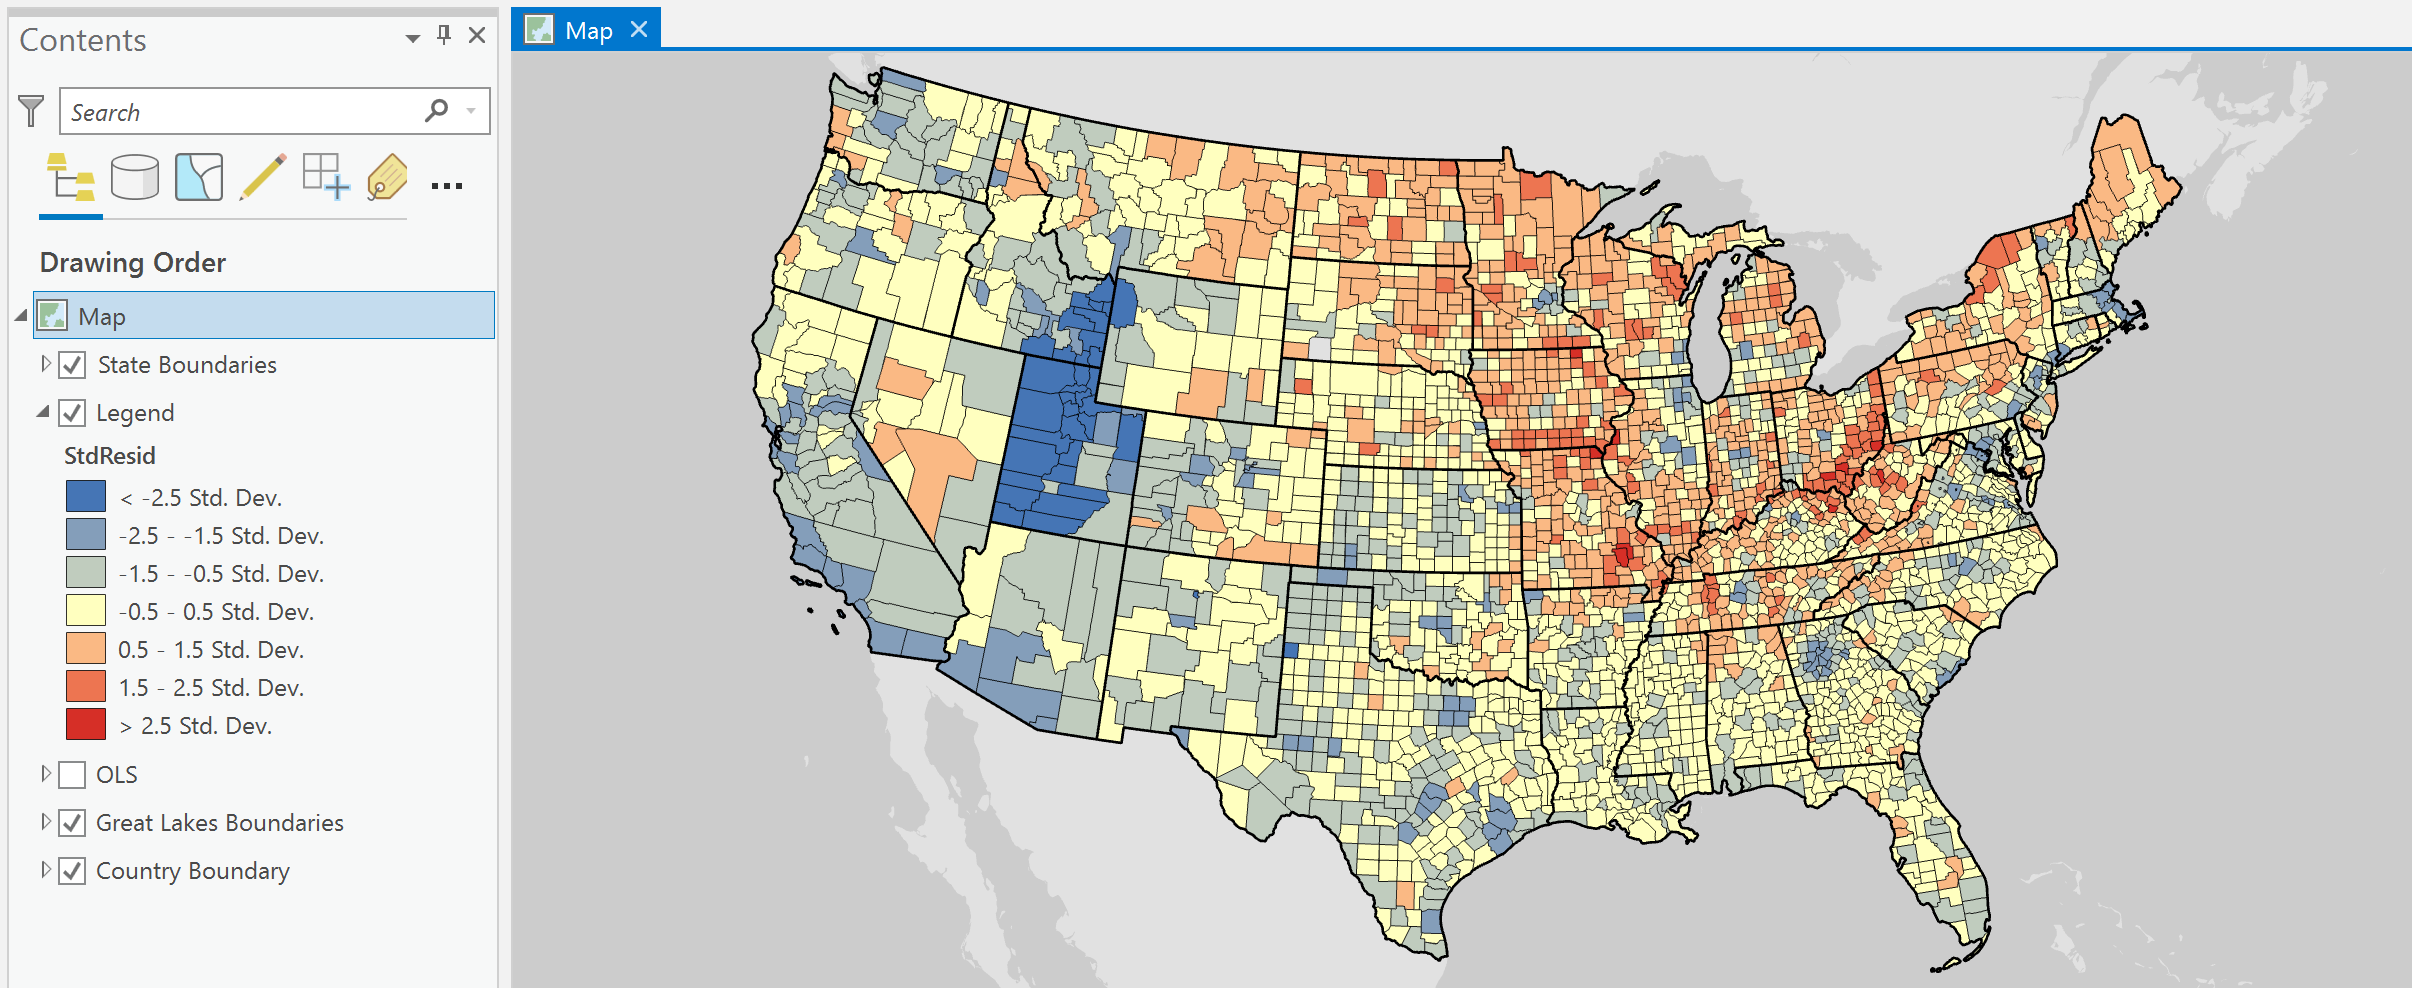

<center>Figure VIII. Four-Year Trend Analysis Map - Trump Vote by Counties in Blue States (Percent) vs. County Population with Obesity (Percent)</center>

#### VI. References

1. [US County-Level Election Results](https://github.com/tonmcg/US_County_Level_Election_Results_08-16)
2. [County Health Rankings & Roadmaps](http://www.countyhealthrankings.org/)
3. [American FactFinder](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_B01003&prodType=table)
4. [Wikipedia](https://en.wikipedia.org/wiki/Red_states_and_blue_states)
5. [United States Census Bureau](https://www.census.gov/programs-surveys/geography.html)